<a href="https://colab.research.google.com/github/DavidUgoOmenukwa/EEGPredict/blob/master/FFT_EEG_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Try to find the frequencies and amplitudes of each sine waves from each complex number. Average every number in a 10 range. Save it, then use it when predicting (kNN, same formulas as before, but this time, just one cityblock)

In [ ]:
import pickle
import pandas as pd
import numpy as np
import ast
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.signal import welch

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
def from_np_array(array_string):
    array_string = ','.join(array_string.replace('[ ', '[').split())
    return np.array(ast.literal_eval(array_string))

In [ ]:
File= '/content/gdrive/My Drive/Colab Notebooks/EEG Database.csv'

EEG_df=pd.read_csv(File,converters={'Fp1': from_np_array, 'AF3': from_np_array, 'F3': from_np_array, 'F7': from_np_array, 
                                        'FC5': from_np_array, 'FC1': from_np_array, 'C3': from_np_array, 'T7': from_np_array, 
                                        'CP5': from_np_array, 'CP1': from_np_array, 'P3': from_np_array, 'P7': from_np_array, 
                                        'PO3': from_np_array, 'O1': from_np_array, 'Oz': from_np_array, 'Pz': from_np_array, 
                                        'Fp2': from_np_array, 'AF4': from_np_array, 'Fz': from_np_array, 'F4': from_np_array, 
                                        'F8': from_np_array, 'FC6': from_np_array, 'FC2': from_np_array, 'Cz': from_np_array, 
                                        'C4': from_np_array, 'T8': from_np_array, 'CP6': from_np_array, 'CP2': from_np_array, 
                                        'P4': from_np_array, 'P8': from_np_array, 'PO4': from_np_array, 'O2': from_np_array})

EEG_df

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,P3,P7,PO3,O1,Oz,Pz,Fp2,AF4,Fz,F4,F8,FC6,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Valence,Arousal,Dominance,Liking
0,"[0.61148111, 0.29997902, 0.56116436, 0.5602481...","[0.679771036, 0.690816179, 0.527706646, 0.4442...","[0.62889617, 1.05671573, 0.86235842, 0.4461021...","[-0.6518279, -1.50602464, -1.39095005, -1.1541...","[-0.30939796, -1.07796154, -1.89256753, -2.369...","[1.61516093, 1.40678978, 0.87324199, -0.242817...","[0.25413137, 0.04197208, -0.83095134, -1.08930...","[-0.23927735, -0.61960751, -1.83927761, -1.950...","[-0.80314999, -1.04892364, -2.06421478, -1.801...","[1.22698356, -0.09598572, -0.90291372, -0.6862...","[0.0915215929, -1.01479734, -1.85755082, -1.65...","[-1.10834034, -1.2302885, -1.80265991, -1.9008...","[-0.32675436, -0.82053405, -1.65821251, -1.612...","[-1.1415183, -1.19679937, -0.86665178, -0.7800...","[-0.971011814, -0.963236935, -0.845263501, -0....","[0.54833139, -0.5424399, -1.13546417, -0.74362...","[-0.00364224, 0.80540405, 2.1278079, 2.1797059...","[0.25848804, 1.10811299, 2.43251976, 2.5041564...","[0.92170547, 1.91252759, 2.82659809, 2.1922419...","[0.39685158, 1.50298779, 2.47199911, 2.3873201...","[-0.557880336, 0.0728014713, 1.16012998, 1.745...","[-0.361954867, 0.979270077, 1.68128872, 1.4897...","[1.03691786, 2.49240014, 3.28287696, 2.4073364...","[1.00645694, 1.48258401, 2.24804956, 1.7123436...","[0.549866502, 1.2523756, 2.13180629, 1.7466216...","[-0.72217059, -0.79248895, -0.42668137, -0.220...","[-0.186352291, -0.406302528, -0.801266409, -0....","[0.108684673, 0.779207237, 1.34118161, 1.14908...","[0.016320393, -0.507738922, -0.776044702, -0.6...","[-0.1894677, -1.16152218, -2.03199189, -0.6335...","[0.14963308, -0.72051031, -1.17434434, -1.0502...","[-0.646313908, -0.570834061, -1.00003101, -1.0...",7.71,7.60,6.90,7.83
1,"[-1.34278151, -0.09890895, 0.72486404, -0.2397...","[-1.08302293, -0.0382215, 0.37035791, 0.035462...","[-0.801589528, 0.0069836573, 0.18588898, -0.24...","[-2.00126503, -0.51911617, 0.38739475, 0.16035...","[-1.22998279, -0.24661012, -0.0162526331, 0.29...","[-0.16035185, 0.05681779, 0.42685189, 0.798233...","[-2.21909662, -1.04557422, 0.8088004, 1.536189...","[-1.88551505, -0.89188057, 0.03753245, 1.00807...","[-1.22624128, -0.764100788, -0.0615352769, 0.8...","[1.25564846, 1.01463845, 0.90115129, 1.0085453...","[0.979877914, 0.853271833, 0.367960768, 0.0672...","[-0.95249395, -0.77579822, -0.03302346, 0.5130...","[1.5934463, 1.65323976, 0.800482656, -0.250610...","[0.85341478, 0.93651217, 0.10471085, -0.636660...","[1.97663302, 1.84864135, 0.86278977, -0.183717...","[2.72296034, 2.35692883, 1.27001499, 0.2111422...","[-1.12931077, -1.13413576, -0.642987045, 0.207...","[-0.107520741, -0.407833965, -0.261734359, 0.2...","[-0.56317091, -0.73831717, -0.0111833, 0.53165...","[-1.16075253, -1.40620317, -0.954036566, -0.19...","[-1.35333015, -1.37734358, -0.653520205, 0.039...","[-0.1730582, -1.13831034, -1.46232656, -0.9334...","[-0.54829575, -1.59309288, -1.28995218, -0.329...","[-0.0149394204, -1.13934972, -0.673220666, 0.7...","[-0.0191404621, -1.17960812, -1.08620627, -0.2...","[0.802064705, -0.0102484881, -0.853131477, -0....","[0.42538451, -0.31801504, -1.00862238, -1.5733...","[0.98603309, 0.12164823, -0.40787186, -0.07886...","[1.80633438, 1.11025686, 0.05608734, -0.773399...","[0.553940595, 0.260397708, 0.21260065, -0.6900...","[2.33048799, 1.79821981, 0.342425429, -1.04081...","[1.8867539, 1.7239606, 0.73738307, -0.7308176,...",8.10,7.31,7.28,8.47
2,"[-0.92634613, -1.17844907, -1.10709059, 0.5911...","[-1.51344696, -0.63736043, 0.61024693, 1.07920...","[-1.17673803, -0.48684967, 0.74756684, 1.26763...","[-1.90836501, -0.756158676, -0.18729628, 0.506...","[-0.528169404, -0.469391465, -0.362725381, -0....","[-0.366785142, -0.445664849, -0.312477443, 0.2...","[-0.193520606, 0.153722729, 0.347358684, 0.664...","[-0.791521984, -0.813056468, -0.39306245, -0.0...","[-0.0541755827, 0.203056572, 0.270647726, 0.56...","[1.2138446, 0

In [ ]:
EEG_df_FFT=EEG_df.copy(deep=True)
Threshold=3

for i in range(len(EEG_df)):
  for j in range(32):
    X, Y =welch(EEG_df.iloc[i,j],scaling='spectrum')
    EEG_df_FFT.iat[i,j]=[X, Y*100]

EEG_df_FFT
# Fit each channel in each row to a sum of sine functions to the set of points (modulus, mod(phase,2*pi))

/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 217, using nperseg = 217
  .format(nperseg, input_length))


,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,P3,P7,PO3,O1,Oz,Pz,Fp2,AF4,Fz,F4,F8,FC6,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Valence,Arousal,Dominance,Liking
0,"[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...",7.71,7.60,6.90,7.83
1,"[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...",8.10,7.31,7.28,8.47
2,"[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.00390625, 0.0078125, 0.01171875, 0.01...","[[0.0, 0.0039

In [ ]:
EEG_df_FFT_Binned=EEG_df.copy(deep=True)

BinSize=10
Distance=1000

for i in range(len(EEG_df_FFT)):
  for j in range(32):
    Bins=[[] for _ in range(int(0.5*Distance/BinSize)+1)]
    
    for k in range(len(EEG_df_FFT.iloc[i,j][0])):
      Bins[int(EEG_df_FFT.iloc[i,j][0][k]*Distance/BinSize)].append(EEG_df_FFT.iloc[i,j][1][k])
    

    EEG_df_FFT_Binned.iat[i,j]=np.array([0 if len(_)==0 else np.mean(_) for _ in Bins])

drive.mount('/drive')

EEG_df_FFT_Binned.to_csv('/drive/My Drive/Colab Notebooks/EEG FFT.csv',index=False)

EEG_df_FFT_Binned

Mounted at /drive


,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,P3,P7,PO3,O1,Oz,Pz,Fp2,AF4,Fz,F4,F8,FC6,FC2,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Valence,Arousal,Dominance,Liking
0,"[0.00034875677242582787, 0.0004758421179856811...","[0.00018109407518270197, 0.0005626815272435526...","[0.0005672716310918368, 0.0004410652808113003,...","[0.00012937032307749357, 0.0001563862295683975...","[0.0010432170106304563, 0.00023733541987352387...","[0.0006449868721776147, 0.00031433258077809154...","[0.014439730917754355, 0.00010559444979010716,...","[0.010226215466393558, 1.2604409630893247e-05,...","[0.004771540666241553, 6.78503039550131e-05, 0...","[0.006728447512294674, 1.5186493121287171e-05,...","[0.0025009454849080005, 0.00011572971932378153...","[8.49233023788658e-05, 0.00021514279266020547,...","[8.21679345535699e-05, 0.0001750461972970247, ...","[0.0011571548259110395, 0.00024636770539222797...","[5.1616922998532465e-05, 0.0004760772780983018...","[0.005483406834784821, 9.750815960327847e-05, ...","[9.504939959894129e-06, 0.000248328359872208, ...","[6.372666200208692e-05, 0.0001780056721900823,...","[0.002711800388053718, 0.0004247822915819463, ...","[0.00019066902774325602, 0.0002468347344175053...","[0.0007387632422251926, 0.00014035279784007325...","[0.00025203377078613075, 3.0449000795722682e-0...","[0.00016319671589818362, 0.0002927100075017612...","[0.004280258297148791, 0.00020494231055396208,...","[0.00018672200752048812, 2.0248248662239897e-0...","[0.005461047771705976, 6.98519576350496e-05, 0...","[0.0042058718727606996, 0.00012834097991195055...","[0.0029582777103801913, 6.429629791634132e-05,...","[0.00896973812620074, 0.00029095500752928765, ...","[0.0029723067982868365, 0.00019887545359160606...","[0.001913889194355485, 0.0005127243457843557, ...","[1.6216671446050227e-05, 0.0007289026921167057...",7.71,7.60,6.90,7.83
1,"[0.0005061036655398201, 4.051911306695037e-05,...","[0.0010598859880133606, 8.232161222926773e-05,...","[0.0007114659591256011, 5.004088762922525e-05,...","[0.005701563302219332, 3.916199632996082e-05, ...","[0.0002312001185856908, 1.4750156302781784e-05...","[0.000752770396837767, 3.000793319216615e-05, ...","[0.0037408790926401914, 0.00018725537262717358...","[0.00010450272332545458, 7.424694765799798e-05...","[5.55471159517658e-06, 7.916257664032514e-05, ...","[0.004219366676224491, 7.056690449633062e-06, ...","[2.346663431139876e-05, 1.4849658006004088e-05...","[0.0002587893351969999, 4.009844328064859e-06,...","[0.004588568794841908, 1.0801835690959683e-05,...","[0.004798945803125003, 3.1849407260422014e-05,...","[0.018044665599981476, 3.935405113835245e-05, ...","[0.01658752813350629, 3.384519828260738e-05, 0...","[0.001332632080623079, 6.001223669115264e-05, ...","[0.00243540106087032, 4.899330389104883e-05, 0...","[0.00025789883300555354, 1.3731212522401798e-0...","[0.002353120980982334, 2.673823199897621e-05, ...","[0.0028823417653178317, 4.022179498103013e-05,...","[0.009201295770091317, 7.454650796794531e-05, ...","[0.0019850435111343615, 7.5444456407380584e-06...","[0.0014079138920920417, 1.822401474728841e-05,...","[0.005845501216986467, 0.00011419334246833467,...","[0.0016978048772897344, 0.00016043733631293907...","[0.0007177427424227037, 0.00010307922838762993...","[6.643451764185148e-05, 5.4437620359432526e-05...","[0.0011622978648831808, 8.746524394415314e-05,...","[0.0016052467994879533, 3.167661009747756e-05,...","[0.005658990883130918, 4.334333144521394e-05, ...","[0.005656529868934952, 2.244958093998058e-05, ...",8.10,7.31,7.28,8.47
2,"[1.7468260520305313e-05, 1.886929539045815e-05...","[5.033030367106752e-05, 3.136765021971989e-05,...","[0.00010586449279894788, 4.22482779010004e-05,...","[0.003097781203916032, 4.290939800990571e-05, ...","[7.056305727919425e-05, 3.199787398552033e-06,...","[0.0003705904046081218, 3.2515847060577255e-05...","[0.0017500265317954905, 2.29505234833428e-05, ...","[0.00012313906983988702, 1.5861951175003933e-0...","[8.547836405178328e-05, 2.590541046668961e-05,...","[0.0001507253

51


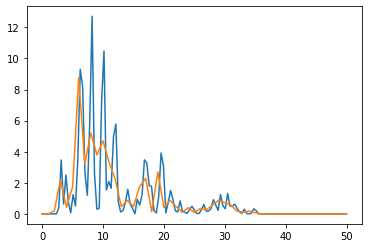

In [ ]:
i=0
j=0

print(len(EEG_df_FFT_Binned.iloc[i,j]))
plt.plot(EEG_df_FFT.iloc[i,j][0]*100,EEG_df_FFT.iloc[i,j][1])
plt.plot(EEG_df_FFT_Binned.iloc[i,j])